In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 


In [4]:
td_train = pd.read_csv(r"C:\Users\SONY\Downloads\termdeposit_train (1).csv")
td_test = pd.read_csv(r"C:\Users\SONY\Downloads\termdeposit_test.csv")


In [5]:
td_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
td_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
td_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
td_train.shape


(31647, 18)

In [9]:
td_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [10]:
td_train.isnull().sum()


ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
td_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Univariate Analysis
Analysis of subscribed variable

In [12]:
td_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

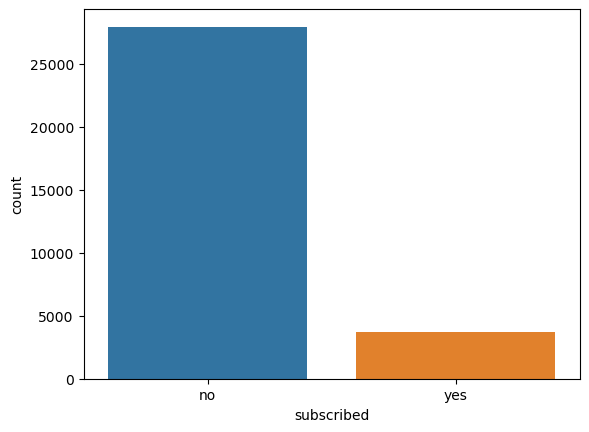

In [13]:
sns.countplot(data=td_train, x='subscribed')


In [14]:
#Normalizing the frequency table of 'Subscribed' variable
td_train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [15]:
#Analysing the 'Job' variable
#Frequency table
td_train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

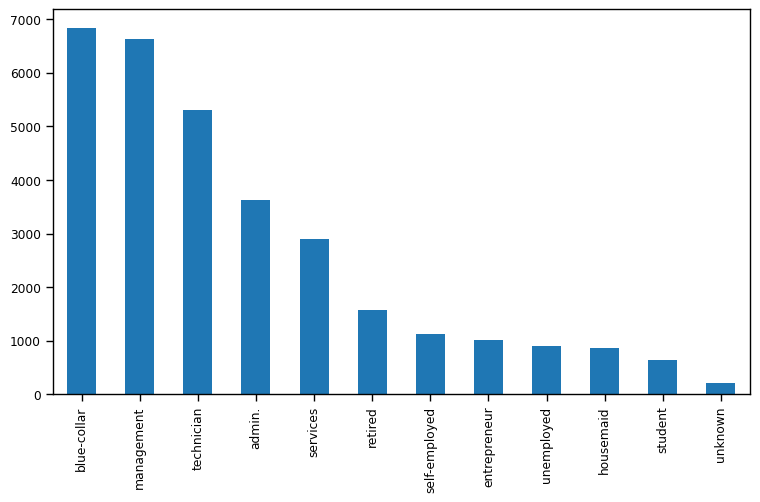

In [16]:
# Plotting the job frequency table
sns.set_context('paper')
td_train['job'].value_counts().plot(kind='bar', figsize=(9,5));

We can see that most of the clients beloned to blue-collar job.
Students are least in general as they don't make term deposits in general.

In [17]:
#Analysis of 'marital' status
td_train['marital'].value_counts()


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

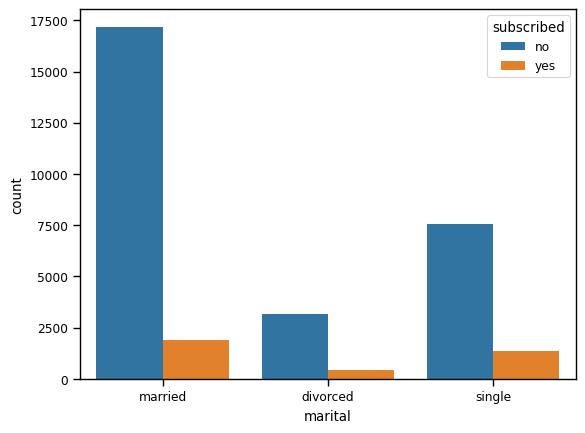

In [18]:
sns.countplot(data=td_train, x='marital', hue='subscribed');


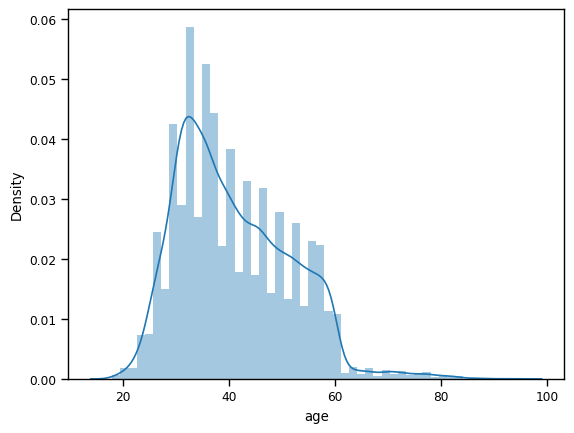

In [19]:
#Analyzing the 'age' variable
sns.distplot(td_train['age']);


We can infer that most of the clients fall in the age group between 20-60.



Bivariate Analysis


In [20]:
#job vs subscribed
print(pd.crosstab(td_train['job'],td_train['subscribed']))


subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [21]:
job = pd.crosstab(td_train['job'],td_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)


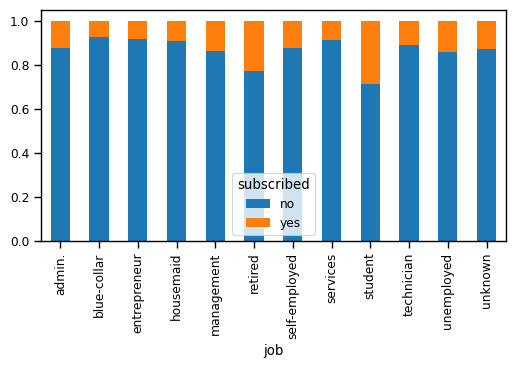

In [22]:
job_norm.plot.bar(stacked=True,figsize=(6,3));


From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.



In [23]:
#Marital status vs subscribed
pd.crosstab(td_train['marital'], td_train['subscribed'])


subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [24]:
marital = pd.crosstab(td_train['marital'], td_train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


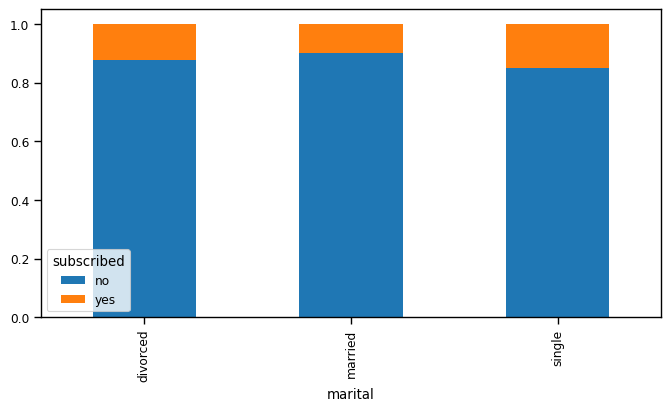

In [27]:
marital_norm.plot.bar(stacked=True, figsize=(8,4));


From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.



In [31]:
dflt = pd.crosstab(td_train['default'], td_train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


In [33]:
#default vs subscription
pd.crosstab(td_train['default'], td_train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


<AxesSubplot:xlabel='default'>

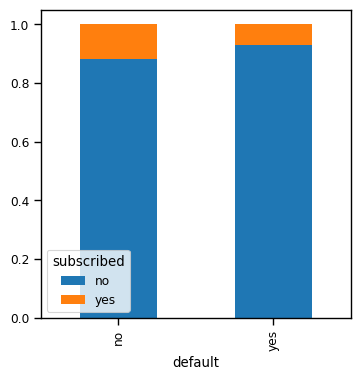

In [34]:
dflt_norm.plot.bar(stacked=True, figsize=(4,4))


We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.



In [35]:
# Converting the target variables into 0s and 1s
td_train['subscribed'].replace('no', 0,inplace=True)
td_train['subscribed'].replace('yes', 1,inplace=True)

In [36]:
td_train['subscribed']


0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [38]:
#Correlation matrix
td_c = td_train.corr()
td_c

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<AxesSubplot:>

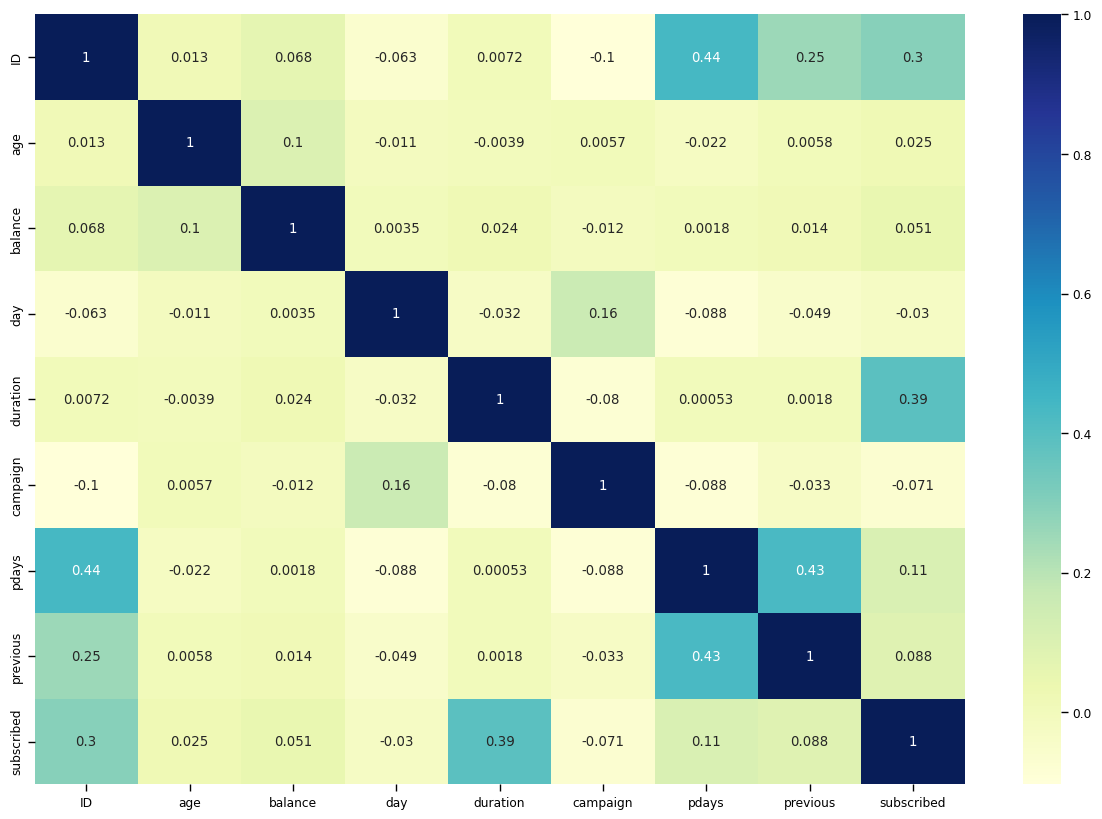

In [40]:
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(td_c, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.



In [49]:
target = td_train['subscribed']
train = td_train.drop('subscribed', axis=1)

In [50]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)


In [52]:
Lr = LogisticRegression()


In [53]:
Lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
pred = Lr.predict(X_val)


In [55]:
accuracy_score(y_val,pred)

0.8909952606635071

Decision Tree


In [56]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=0)

In [57]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [58]:
predict = dtc.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
accuracy_score(y_val,predict)

0.9042654028436019

In [62]:
td_test = pd.get_dummies(td_test)
td_test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [63]:
td_test_pred = dtc.predict(td_test)
td_test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [64]:
submission = pd.DataFrame()


In [65]:
submission['ID'] = td_test['ID']
submission['subscribed'] = td_test_pred

In [66]:
submission['subscribed']


0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [67]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [68]:
submission['subscribed']


0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [69]:
submission.to_csv('submission file.csv', header=True, index=False)
